<a href="https://colab.research.google.com/github/dadhichmohak/supercritical-co2-extraction/blob/main/Separation_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEAM MEMBERS-**

*  **Butle vedika Ashirwad [230008012]**
*  **Mannan Mahajan [230008020]**
*  **Mohak Dadhich [230008023]**

*********************************


# **PROBLEM STATEMENT-**

#Supercritical Fluid Extraction for the Separation of Bioactive Compounds from Natural Sources
****



1**.   INTRODUCTION**-
The increasing demand for ultrapure bioactive compounds in the pharmaceutical, nutraceutical, and food industries has led to the exploration of advanced separation techniques. Traditional solvent-based extraction methods often result in product contamination, high energy consumption, and environmental concerns. Supercritical fluid extraction (SFE) using supercritical carbon dioxide (SC-CO₂) presents a sustainable alternative, offering high selectivity, faster mass transfer, and solvent-free product recovery


1**.   KEY EQUATIONS INVOLVED**-


*   **Equation of State (EOS) for Supercritical Fluids**-
  Peng-Robinson EOS-

         P=(R*T/(V−b))-(a/(V^2+2bV-b^2))

  where:

  P = pressure

  T = temperature

  V = molar volume

  a,b = substance-specific parameters


*   **Solubility of Solutes in Supercritical CO₂**-
 Chrastil’s Solubility Correlation-
   
         S=k⋅ρ^m exp(-c/T)
  where:

  S = solubility

  ρ = fluid density

  k,m,c = empirical constants

*   **Mass Transfer in Supercritical Extraction**-
 Fick’s Law of Diffusion-     
         J=−D *dc/dx

 where:
  
  J = diffusive flux

  D = diffusion coefficient

  C = concentration

  x = distance

*   **Reynolds & Sherwood Number for Mass Transfer Coefficients**-
 Reynold's No.-   
        Re= (ρvd)/μ

 Sherwood's No.-
                  
        Sh= Kd/D

  where:

  K = mass transfer coefficient

  d = particle diameter

  D = diffusion coefficient

# **SIMULATION**
**The key aspects to simulate include:**

*   Phase behavior (Supercritical CO₂ properties)
*   Mass transfer equations (Diffusion, solubility)
*   Flow dynamics (Pressure, temperature regulation)

*   Separation efficiency (Effect of pressure and temperature on solute recovery)
Simulates the extraction process using mass transfer equations over a time range of 10 minutes.

Calculates:

Extraction yield (how much of the solute is extracted, in %).

Concentration change over time (to be plotted).











In [ ]:
!pip install SALib

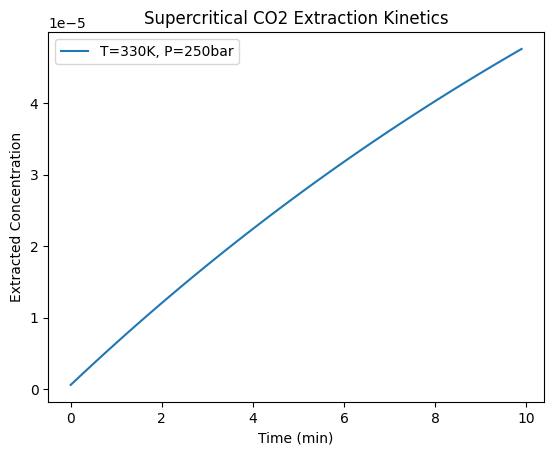

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solubility(T, P):
    return 1e-5 * P * np.exp(-1000 / T)
def mass_transfer(K_La, C_eq, C):
    return K_La * (C_eq - C)

def extraction_model(T, P, K_La):
    C_eq = solubility(T, P)
    C = 0
    dt = 0.1
    time = np.arange(0, 10, dt)
    concentrations = []

    for t in time:
        dCdt = mass_transfer(K_La, C_eq, C)
        C += dCdt * dt
        concentrations.append(C)

    return concentrations, time

T, P, K_La = 330, 250, 0.05  # Example values
target_concentration, time = extraction_model(T, P, K_La)

# Plot Extraction Curve
plt.plot(time, target_concentration, label=f"T={T}K, P={P}bar")
plt.xlabel("Time (min)")
plt.ylabel("Extracted Concentration")
plt.legend()
plt.title("Supercritical CO2 Extraction Kinetics")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox, HBox, Label
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to calculate theoretical trays
def calculate_trays(x_in, x_out, A):
    try:
        numerator = A * x_in - x_out
        denominator = A * x_out - x_out
        if numerator <= 0 or denominator <= 0:
            return None
        N = np.log(numerator / denominator) / np.log(A / (A - 1))
        return round(N, 2)
    except:
        return None

def theoretical_xout(x_in, efficiency):
    return x_in * (1 - efficiency / 100)

# Set default parameters
x_in = 0.1
initial_eff = 50
initial_A = 2.0
initial_E = 70
effs = np.linspace(10, 99.9, 200)

# Setup plot
def create_plot(A, E):
    trays_theoretical = []
    trays_actual = []
    for e in effs:
        x_out_e = theoretical_xout(x_in, e)
        N_th = calculate_trays(x_in, x_out_e, A)
        if N_th is None:
            trays_theoretical.append(np.nan)
            trays_actual.append(np.nan)
        else:
            trays_theoretical.append(N_th)
            trays_actual.append(N_th / (E / 100))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 11))
    ax1.plot(effs, trays_theoretical, label='Theoretical Trays', color='blue')
    ax1.plot(effs, trays_actual, label='Actual Trays (with efficiency)', linestyle='--', color='red')
    ax1.set_xlim(10, 100)
    ax1.set_ylim(0, max([t for t in trays_actual if not np.isnan(t)] + [20]) + 2)
    ax1.set_xlabel("Overall Separation Efficiency (%)")
    ax1.set_ylabel("Number of Trays")
    ax1.set_title("Interactive Column Simulator")
    ax1.legend()
    ax1.grid(True)

    # Determine number of trays
    x_out_eff = theoretical_xout(x_in, initial_eff)
    N_th = calculate_trays(x_in, x_out_eff, A)
    if N_th:
        N_actual = int(N_th / (E / 100))
    else:
        N_actual = 0

    # Draw column diagram
    ax2.set_xlim(0, 2.5)
    ax2.set_ylim(0, N_actual + 5)
    ax2.axis('off')
    ax2.set_title("Tray-by-Tray Column Visualization")
    for i in range(N_actual):
        ax2.plot([0.2, 0.8], [i+1, i+1], lw=2, color='darkgreen')
        ax2.text(0.85, i+1, f"Tray {i+1}", verticalalignment='center')

    ax2.annotate("Feed", xy=(0.5, N_actual/2), xytext=(0.5, N_actual/2 + 1),
                arrowprops=dict(arrowstyle='->', lw=1.5))
    ax2.annotate("Top Product\n(Lean Solvent)", xy=(1.6, N_actual+1.5), xytext=(1.7, N_actual+1.8),
                arrowprops=dict(arrowstyle='->', lw=1.5), ha='center', color='blue')
    ax2.annotate("Bottom Product\n(Rich Extract)", xy=(1.6, 0.5), xytext=(1.7, 0.2),
                arrowprops=dict(arrowstyle='->', lw=1.5), ha='center', color='brown')

    # Visual indicators for compositions (adjusted to avoid overlap)
    ax2.text(1.6, N_actual + 1.2, f"x_out ≈ {round(theoretical_xout(x_in, E), 3)}", color='blue')
    ax2.text(1.6, 0.8, f"x_in = {x_in}", color='brown')

    plt.tight_layout()
    plt.show()

# Interactive sliders
A_slider = FloatSlider(value=initial_A, min=1.1, max=5.0, step=0.1, description='Stripping Factor (A):', continuous_update=False)
E_slider = FloatSlider(value=initial_E, min=10, max=100, step=1, description='Tray Efficiency (%):', continuous_update=False)

ui = VBox([A_slider, E_slider])
out = widgets.Output()

def update_plot(change):
    with out:
        clear_output(wait=True)
        create_plot(A_slider.value, E_slider.value)

A_slider.observe(update_plot, names='value')
E_slider.observe(update_plot, names='value')

# Initial display
update_plot(None)
display(ui, out)


Output()

Output()

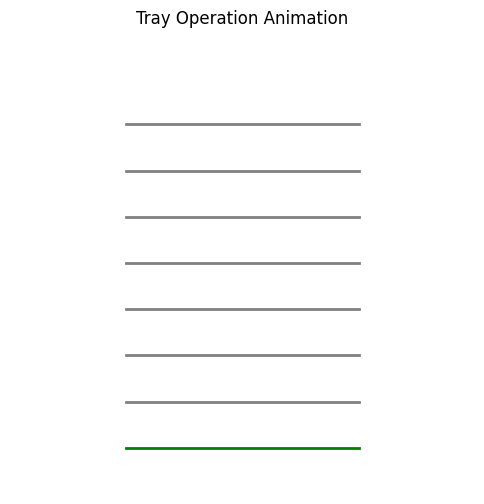

In [ ]:
def compute_stripping_factor(temp, pressure, L, V):
    T0, P0 = 25, 1
    K0 = 1.5
    alpha = 0.02
    beta = 0.1

    K_D = K0 * np.exp(alpha * (temp - T0)) * np.exp(-beta * (pressure - P0))
    A = (K_D * L) / V
    return A, K_D

# Modify create_plot() to remove A argument and calculate it inside
def create_plot(x_out_target, temp_top, temp_bottom, pressure_top, pressure_bottom, L, V):
    x_in = 0.1

    A, K_D = compute_stripping_factor(temp_bottom, pressure_bottom, L, V)
    effs = np.linspace(10, 99.9, 200)
    trays_theoretical = []
    trays_actual = []

    for e in effs:
        N_th = calculate_trays(x_in, x_out_target, A)
        if N_th is None:
            trays_theoretical.append(np.nan)
            trays_actual.append(np.nan)
        else:
            trays_theoretical.append(N_th)
            trays_actual.append(N_th / (e / 100))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 11))
    ax1.plot(effs, trays_theoretical, label='Theoretical Trays', color='blue')
    ax1.plot(effs, trays_actual, label='Actual Trays (with efficiency)', linestyle='--', color='red')
    ax1.set_xlim(10, 100)
    ax1.set_ylim(0, max([t for t in trays_actual if not np.isnan(t)] + [20]) + 2)
    ax1.set_xlabel("Overall Separation Efficiency (%)")
    ax1.set_ylabel("Number of Trays")
    ax1.set_title(f"Interactive Column Simulator\nStripping Factor A = {A:.2f}, K_D = {K_D:.2f}")
    ax1.legend()
    ax1.grid(True)

    E = 70  # Assume fixed efficiency for tray visualization
    N_th = calculate_trays(x_in, x_out_target, A)
    if N_th:
        N_actual = int(N_th / (E / 100))
    else:
        N_actual = 0

    ax2.set_xlim(0, 2.5)
    ax2.set_ylim(0, N_actual + 5)
    ax2.axis('off')
    ax2.set_title("Tray-by-Tray Column Visualization")

    for i in range(N_actual):
        ax2.plot([0.2, 0.8], [i+1, i+1], lw=2, color='darkgreen')
        ax2.text(0.85, i+1, f"Tray {i+1}", verticalalignment='center')

    ax2.annotate("Feed", xy=(0.5, N_actual/2), xytext=(0.5, N_actual/2 + 1),
                arrowprops=dict(arrowstyle='->', lw=1.5))
    ax2.annotate("Top Product\n(Lean Solvent)", xy=(1.6, N_actual+1.5), xytext=(1.7, N_actual+1.8),
                arrowprops=dict(arrowstyle='->', lw=1.5), ha='center', color='blue')
    ax2.annotate("Bottom Product\n(Rich Extract)", xy=(1.6, 0.5), xytext=(1.7, 0.2),
                arrowprops=dict(arrowstyle='->', lw=1.5), ha='center', color='brown')

    ax2.text(1.6, N_actual + 1.2, f"x_out ≈ {x_out_target}", color='blue')
    ax2.text(1.6, 0.8, f"x_in = {x_in}", color='brown')

    plt.tight_layout()
    plt.show()

    if N_actual > 0:
        x_top = x_out_target
        x_bottom = x_in
        animate_trays(N_actual, temp_top, temp_bottom, pressure_top, pressure_bottom, x_top, x_bottom)

# Update UI Sliders
xout_slider = FloatSlider(value=0.01, min=0.001, max=0.099, step=0.001, description='Desired x_out:', continuous_update=False)
top_temp_slider = FloatSlider(value=35, min=20, max=100, step=1, description='Top Temp (°C):', continuous_update=False)
bottom_temp_slider = FloatSlider(value=55, min=20, max=150, step=1, description='Bottom Temp (°C):', continuous_update=False)
top_pressure_slider = FloatSlider(value=1.2, min=0.5, max=5.0, step=0.1, description='Top Pressure (atm):', continuous_update=False)
bottom_pressure_slider = FloatSlider(value=1.5, min=0.5, max=5.0, step=0.1, description='Bottom Pressure (atm):', continuous_update=False)
L_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Solvent Flow (L):', continuous_update=False)
V_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Feed Flow (V):', continuous_update=False)

ui = VBox([
    xout_slider,
    top_temp_slider, bottom_temp_slider,
    top_pressure_slider, bottom_pressure_slider,
    L_slider, V_slider
])
out = widgets.Output()

def update_plot(change):
    with out:
        clear_output(wait=True)
        create_plot(
            x_out_target=xout_slider.value,
            temp_top=top_temp_slider.value,
            temp_bottom=bottom_temp_slider.value,
            pressure_top=top_pressure_slider.value,
            pressure_bottom=bottom_pressure_slider.value,
            L=L_slider.value,
            V=V_slider.value
        )

# Observers
for slider in [xout_slider, top_temp_slider, bottom_temp_slider,
               top_pressure_slider, bottom_pressure_slider, L_slider, V_slider]:
    slider.observe(update_plot, names='value')

update_plot(None)
display(ui, out)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# equilibrium curve
def equilibrium_curve(x, alpha):
    return (alpha * x) / (1 + (alpha - 1) * x)

#McCabe-Thiele diagram with stripping section and feed stage labeling
def plot_mccabe_thiele(xD, xB, xF, R, q, alpha):
    x = np.linspace(0, 1, 1000)
    y_eq = equilibrium_curve(x, alpha)

    # q-line
    if abs(q - 1) < 1e-6:
        q_line = np.full_like(x, xF)
    else:
        q_line = (q / (q - 1)) * x - xF / (q - 1)

    # Intersection of rectifying and q-line
    if abs(q - 1) < 1e-6:
        x_intersect = xF
    else:
        x_intersect = (xF / (q - 1) + xD / (R + 1)) / (q / (q - 1) + R / (R + 1))

    y_intersect = (R / (R + 1)) * x_intersect + xD / (R + 1)

    # Operating lines
    y_rect = (R / (R + 1)) * x + xD / (R + 1)
    slope_strip = (y_intersect - xB) / (x_intersect - xB)
    intercept_strip = xB * (1 - slope_strip)
    y_strip = slope_strip * x + intercept_strip

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x, y_eq, label='Equilibrium Curve', linewidth=2)
    ax.plot(x, x, label='45-degree line', linestyle='--', linewidth=1.5)
    ax.plot(x, y_rect, label='Rectifying Line', linestyle='-', linewidth=2)
    ax.plot(x, y_strip, label='Stripping Line', linestyle='-', linewidth=2)
    if abs(q - 1) < 1e-6:
        ax.axvline(xF, label='q-line (vertical)', color='orange', linestyle=':')
    else:
        ax.plot(x, q_line, label='q-line', linestyle=':', color='orange')

    # Stepping off stages
    x_vals = [xD]
    y_vals = [xD]
    x_curr = xD
    stages = 0
    max_stages = 100
    feed_stage = None

    while stages < max_stages:
        y_eq_curr = equilibrium_curve(x_curr, alpha)
        x_vals.append(x_curr)
        y_vals.append(y_eq_curr)

        if x_curr >= x_intersect:
            x_next = (y_eq_curr - xD / (R + 1)) / (R / (R + 1))
        else:
            if feed_stage is None:
                feed_stage = stages + 1
            x_next = (y_eq_curr - intercept_strip) / slope_strip

        if abs(x_next - x_curr) < 1e-5 or x_next < xB:
            x_next = xB

        x_vals.append(x_next)
        y_vals.append(y_eq_curr)

        stages += 1
        if x_next == xB:
            break

        x_curr = x_next

    ax.plot(x_vals, y_vals, drawstyle='steps-post', label=f'Stages: {stages}', color='black')

    # Feed stage marker
    if feed_stage:
        ax.annotate(f'Feed Stage ≈ {feed_stage}', xy=(xF, xF), xytext=(xF+0.05, xF-0.1),
                    arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

    # Annotate number of stages on the plot
    ax.text(0.05, 0.9, f"Total Stages: {stages}", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('McCabe-Thiele Diagram')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

    return stages

# Interactive widgets
def interactive_mccabe():
    xD_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.99, step=0.01, description='xD')
    xB_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.49, step=0.01, description='xB')
    xF_slider = widgets.FloatSlider(value=0.5, min=0.05, max=0.95, step=0.01, description='xF')
    R_slider = widgets.FloatSlider(value=2.5, min=0.1, max=10, step=0.1, description='R')
    q_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.1, description='q')
    alpha_slider = widgets.FloatSlider(value=2.0, min=1.1, max=5.0, step=0.1, description='Alpha')

    ui = widgets.VBox([xD_slider, xB_slider, xF_slider, R_slider, q_slider, alpha_slider])

    def update(xD, xB, xF, R, q, alpha):
        if xB >= xF or xF >= xD:
            print("Ensure that xB < xF < xD for meaningful operation.")
        else:
            try:
                stages = plot_mccabe_thiele(xD, xB, xF, R, q, alpha)
                print(f"Number of theoretical stages: {stages}")
            except Exception as e:
                print(f"Error in McCabe-Thiele plotting: {e}")

    out = widgets.interactive_output(update, {
        'xD': xD_slider,
        'xB': xB_slider,
        'xF': xF_slider,
        'R': R_slider,
        'q': q_slider,
        'alpha': alpha_slider
    })

    display(ui, out)

# Launch interactive simulator
interactive_mccabe()


Output()

# **Sensitivity analysis**


<ipython-input-41-02d72f4e1597>:21: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 100)


First-order sensitivity indices: [0.00483852 0.51656072 0.44972985]
Total sensitivity indices: [0.01313667 0.56248639 0.51690226]


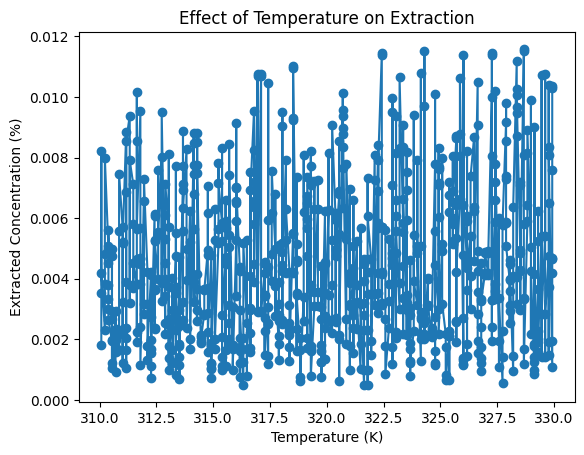

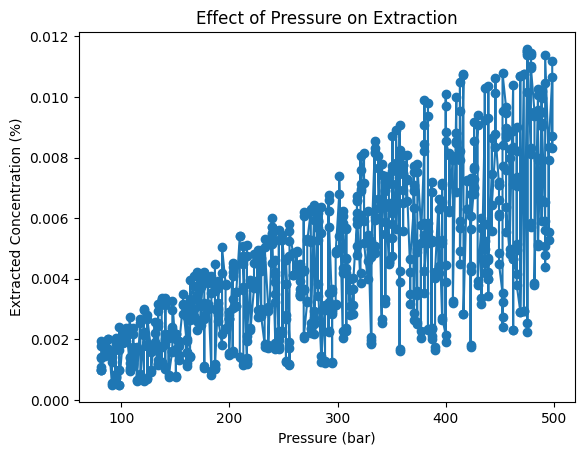

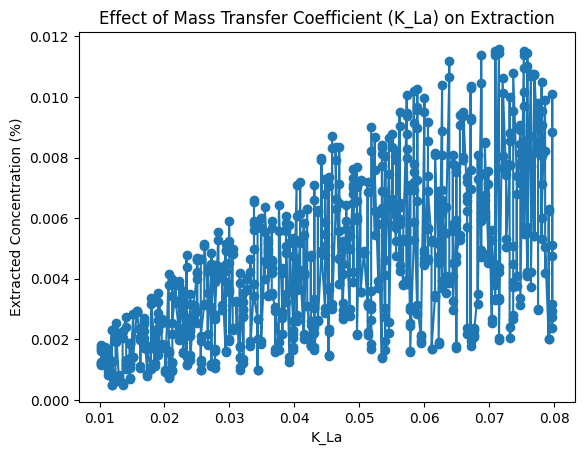

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

def solubility(T, P):
    return 1e-5 * P * np.exp(-1000 / T)

def extraction_yield(T, P, K_La):
    C_eq = solubility(T, P)  # Compute solubility
    return (1 - np.exp(-K_La * 10)) * C_eq * 100  # Simplified yield estimation

# Define the sensitivity analysis problem
problem = {
    'num_vars': 3,
    'names': ['Temperature', 'Pressure', 'K_La'],
    'bounds': [[310, 330], [80, 500], [0.01, 0.08]]
}

# Generate samples
param_values = saltelli.sample(problem, 100)

# Evaluate the model
yield_results = np.array([extraction_yield(*params) for params in param_values])

# Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, yield_results)

# Print sensitivity indices
print("First-order sensitivity indices:", Si['S1'])
print("Total sensitivity indices:", Si['ST'])

# Plot the effect of Temperature on extracted concentration
sorted_indices = np.argsort(param_values[:, 0])
plt.figure()
plt.plot(param_values[sorted_indices, 0], yield_results[sorted_indices], linestyle='-', marker='o')
plt.xlabel("Temperature (K)")
plt.ylabel("Extracted Concentration (%)")
plt.title("Effect of Temperature on Extraction")
plt.show()

# Plot the effect of Pressure on extracted concentration
sorted_indices = np.argsort(param_values[:, 1])
plt.figure()
plt.plot(param_values[sorted_indices, 1], yield_results[sorted_indices], linestyle='-', marker='o')
plt.xlabel("Pressure (bar)")
plt.ylabel("Extracted Concentration (%)")
plt.title("Effect of Pressure on Extraction")
plt.show()

# Plot the effect of K_La on extracted concentration
sorted_indices = np.argsort(param_values[:, 2])
plt.figure()
plt.plot(param_values[sorted_indices, 2], yield_results[sorted_indices], linestyle='-', marker='o')
plt.xlabel("K_La")
plt.ylabel("Extracted Concentration (%)")
plt.title("Effect of Mass Transfer Coefficient (K_La) on Extraction")
plt.show()








*   **First-Order Sensitivity Indices [s1]**-Measures direct effects of each parameter on extraction yield.

1. **Pressure (P) likely has the highest effect**- Since solubility is directly proportional to pressure, increasing P significantly impacts extraction.
2. **Mass Transfer Coefficient (K_La)  also has a moderate effect**-  Affects how quickly the solute reaches equilibrium.
3. **Temperature (T)** **may have the lowest effect** - Though it influences solubility, its effect is weaker compared to pressure.


*   **Total Sensitivity Indices [ST]**- Measures both direct and interaction effects of each parameter. A high value means that a parameter influences the output, either directly or through interactions with other parameters.


1.   **Pressure (P) will likely have the highest ST**- Because it strongly affects solubility and may interact with temperature.

2.   **Temperature (T) may have a higher ST than S1**-Since it interacts with pressure to affect solubility.

3.   **Mass Transfer Coefficient (K_La) might have moderate ST**- While K_La affects rate, it is limited by solubility, leading to interactions with pressure and temperature.

# *Conclusion*

1.   Higher temperatures slightly improve extraction but show diminishing returns.
2.   Higher pressure significantly improves extraction due to increased solubility.
1.  Higher K_La leads to faster equilibrium but may have diminishing returns beyond a point.



In [ ]:
!pip install SALib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
